In [102]:
import sklearn

In [103]:
import numpy as np
import matplotlib.pyplot as plt

The function compute_cost simply computes the cost of the estimation. 

The function gradient_descent_fed computes the average gradient by giving the same weights to both clusters. 

The function gaussian_mix is a function to produce n_samples samples from a mixture of three Gaussians having means m1, m2 and m3.

In [113]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

def gradient_descent_fed(X1, y1, X2, y2, params, learning_rate, n_iters):
    n_samples = len(y1)
    J_history = np.zeros((n_iters,1))
    for i in range(n_iters):
        params = params - (learning_rate/(2*n_samples)) * (X1.T @ (X1 @ params - y1) + X2.T @ (X2 @ params - y2)) 
        J_history[i] = compute_cost(X1, y1, params) + compute_cost(X2, y2, params)

    return (J_history, params)

def gaussian_mix(m1,m2,m3,cov,n_samples):
    n_samples=int(n_samples/3)
    x, y = np.random.multivariate_normal(m1, cov, n_samples).T
    x=x.reshape((n_samples,1))
    y=y.reshape((n_samples,1))
    data1=np.hstack((x,y))
    x, y = np.random.multivariate_normal(m2, cov, n_samples).T
    x=x.reshape((n_samples,1))
    y=y.reshape((n_samples,1))
    data2=np.hstack((x,y))
    x, y = np.random.multivariate_normal(m3, cov, n_samples).T
    x=x.reshape((n_samples,1))
    y=y.reshape((n_samples,1))
    data3=np.hstack((x,y))
    data=np.vstack((data1,data2,data3))
    np.random.shuffle(data)
    return data

This is an implementation of a simple linear regression algorithm. The data has been generated according to the paper "Multiple Source Adaptation and the Renyi Divergence". Using only two clusters, each having 54000 samples of two different Gaussian mixtures. The input, x, is 2-D data. Cluster 1 is a mixture of (m1, m2, m3) Gaussians. Cluster 2 is a mixture of (m1, m3, m4) Gaussians. The covariance for both is the 2-D identity matrix. The plot is that of convergence of the cost function with the iteration number.

Total samples in our dataset is: 54000
Initial cost is:  1.0 

Optimal parameters are: 
 [[ 0.15188884]
 [ 0.15432457]
 [-0.15173227]] 

Final cost is:  [0.94109266]


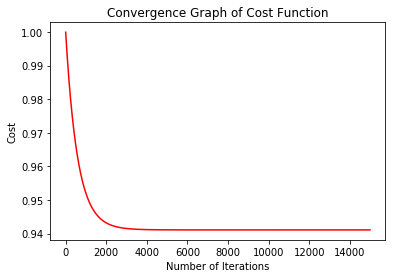

In [115]:
m1=[1,1]
m2=[-1,1]
m3=[-1,-1]
m4=[1,-1]
cov=[[1,0],[0,1]]
X1 = gaussian_mix(m1,m2,m3,cov,54000)
y1 = np.sign(X1[:,0]*X1[:,1]).reshape((54000,1))

X2 = gaussian_mix(m1,m3,m4,cov,54000)
y2 = np.sign(X1[:,0]*X1[:,1]).reshape((54000,1))

print("Total samples in our dataset is: {}".format(X1.shape[0]))
n_samples = len(y1)

mu = np.mean(X1, 0)
sigma = np.std(X1, 0)
X1 = (X1-mu) / sigma
X1 = np.hstack((np.ones((n_samples,1)),X1))
n_features = X1.shape[1]
params = np.zeros((n_features,1))

mu = np.mean(X2, 0)
sigma = np.std(X2, 0)
X2 = (X2-mu) / sigma
X2 = np.hstack((np.ones((n_samples,1)),X2))
n_features = X2.shape[1]

n_iters = 15000
learning_rate = 0.001
initial_cost = compute_cost(X1, y1, params) + compute_cost(X2, y2, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent_fed(X1, y1, X2, y2, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

The difference between cost and final cost is not that much. This is just a vanilla implementation of a federated learning scheme. There are lots of ideas and small experiments to run over this.

Following is the run of the same algorithm but on individual datasets. The behavior of gradient descent on the second cluster is interesting.

In [116]:
def gradient_descent(X1, y1, params, learning_rate, n_iters):
    n_samples = len(y1)
    J_history = np.zeros((n_iters,1))
    for i in range(n_iters):
        params = params - (learning_rate/(n_samples)) * (X1.T @ (X1 @ params - y1)) 
        J_history[i] = compute_cost(X1, y1, params)

    return (J_history, params)

## Cluster: 1

Initial cost is:  0.5 

Optimal parameters are: 
 [[ 0.15188884]
 [ 0.30409438]
 [-0.30596038]] 

Final cost is:  [0.4174851]


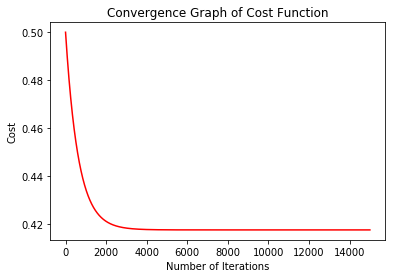

In [117]:
n_iters = 15000
learning_rate = 0.001
initial_cost = compute_cost(X1, y1, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X1, y1, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

## Cluster:2

Initial cost is:  0.5 

Optimal parameters are: 
 [[0.15188884]
 [0.00543964]
 [0.00162698]] 

Final cost is:  [0.4884467]


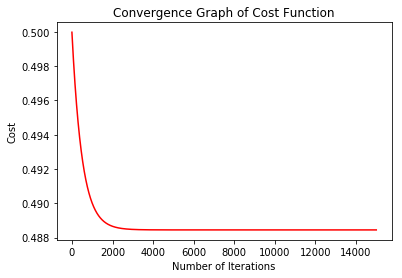

In [118]:
n_iters = 15000
learning_rate = 0.001
initial_cost = compute_cost(X2, y2, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X2, y2, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()